<a href="https://colab.research.google.com/github/mariacmartins/bioinformatica-disciplina/blob/main/Aula_15_Metagen%C3%B4mica_e_Microbioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metagenômica e Microbioma

**Metagenoma:** Conjunto de material genético presente em uma certa amostra complexa obtida a partir de uma comunidade microbiana.

**Microbioma:** Coleção de microrganismos de um particular ecossistema.

Imagine que você está trabalhando como bioinformata em um hospital, no setor de análise clínicas, e é responsável pelas análises de dados de NGS. Em um certo dia vocês recebem uma amostra de plasma de um paciente e é solicitado uma análise completa do seu metagenoma viral (viroma). A amostra é processada no laboratório de biologia molecular, o DNA viral é purificado com sondas e sequenciado com a plataforma Illumina HiSeq 2000. Agora, é necessário analisar os dados de identificar a presença de alguns vírus na amostra.

In [ ]:
!apt install sra-toolkit 

In [ ]:
!wget http://github.com/DerrickWood/kraken2/archive/v2.0.8-beta.tar.gz

In [ ]:
!tar -xvf v2.0.8-beta.tar.gz

In [4]:
%cd kraken2-2.0.8-beta/
!bash install_kraken2.sh /kraken2
%cd ..

/content/kraken2-2.0.8-beta
make: Entering directory '/content/kraken2-2.0.8-beta/src'
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o seqreader.o seqreader.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o mmscanner.o mmscanner.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o omp_hack.o omp_hack.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o utilities.o utilities.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING    estimate_capacity.cc seqreader.o mmscanner.o omp_hack.o utilities.o   -o estimate_capacity
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o mmap_file.o mmap_file.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o compact_hash.o compact_hash.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING   -c -o taxonomy.o taxonomy.cc
g++ -fopenmp -Wall -std=c++11 -O3 -DLINEAR_PROBING    build_db.cc mmap_file.o compact_hash.o taxonomy.o seqreader.o mmscanner.o omp_hack.o utilities.o   -o build_db
g++ -fopenmp 

In [5]:
!git clone https://github.com/jenniferlu717/KrakenTools

Cloning into 'KrakenTools'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 313 (delta 67), reused 76 (delta 30), pack-reused 196
Receiving objects: 100% (313/313), 140.01 KiB | 8.24 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [6]:
!git clone https://github.com/marbl/Krona

Cloning into 'Krona'...
remote: Enumerating objects: 1640, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 1640 (delta 7), reused 22 (delta 7), pack-reused 1612
Receiving objects: 100% (1640/1640), 6.17 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (803/803), done.


In [7]:
!pwd

/content


In [8]:
%cd Krona/KronaTools/
!mkdir -p taxonomy
!perl install.pl
!bash updateTaxonomy.sh
!bash updateAccessions.sh
%cd ../..

/content/Krona/KronaTools
Creating links...

Installation complete.

Run ./updateTaxonomy.sh to use scripts that rely on NCBI taxonomy:
   ktClassifyBLAST
   ktGetLCA
   ktGetTaxInfo
   ktImportBLAST
   ktImportTaxonomy
   ktImportMETAREP-BLAST

Run ./updateAccessions.sh to use scripts that get taxonomy IDs from accessions:
   ktClassifyBLAST
   ktGetTaxIDFromAcc
   ktImportBLAST
Fetching taxdump.tar.gz...
   Fetching checksum...
   Checksum for taxdump.tar.gz matches server.
Extracting taxonomy...

Cleaning up...

Finished.

Fetching accession2taxid/dead_nucl.accession2taxid.gz...
   Fetching checksum...
   Checksum for accession2taxid/dead_nucl.accession2taxid.gz matches server.
Fetching accession2taxid/dead_prot.accession2taxid.gz...
   Fetching checksum...
   Checksum for accession2taxid/dead_prot.accession2taxid.gz matches server.
Fetching accession2taxid/dead_wgs.accession2taxid.gz...
   Fetching checksum...
   Checksum for accession2taxid/dead_wgs.accession2taxid.gz matches serv

In [9]:
!wget ftp://ftp.ccb.jhu.edu/pub/data/kraken2_dbs/old/minikraken2_v1_8GB_201904.tgz

--2021-06-21 12:44:55--  ftp://ftp.ccb.jhu.edu/pub/data/kraken2_dbs/old/minikraken2_v1_8GB_201904.tgz
           => ‘minikraken2_v1_8GB_201904.tgz’
Resolving ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)... 128.220.174.63
Connecting to ftp.ccb.jhu.edu (ftp.ccb.jhu.edu)|128.220.174.63|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/data/kraken2_dbs/old ... done.
==> SIZE minikraken2_v1_8GB_201904.tgz ... 6016594204
==> PASV ... done.    ==> RETR minikraken2_v1_8GB_201904.tgz ... done.
Length: 6016594204 (5.6G) (unauthoritative)

minikraken2_v1_8GB_ 100%[===================>]   5.60G  32.8MB/s    in 3m 1s   

2021-06-21 12:47:57 (31.7 MB/s) - ‘minikraken2_v1_8GB_201904.tgz’ saved [6016594204]



In [10]:
!tar -xvf minikraken2_v1_8GB_201904.tgz

minikraken2_v1_8GB/
minikraken2_v1_8GB/taxo.k2d
minikraken2_v1_8GB/database150mers.kmer_distrib
minikraken2_v1_8GB/opts.k2d
minikraken2_v1_8GB/seqid2taxid.map
minikraken2_v1_8GB/database200mers.kmer_distrib
minikraken2_v1_8GB/database100mers.kmer_distrib
minikraken2_v1_8GB/hash.k2d


In [11]:
!fastq-dump --split-3 SRR6243016

Read 7798757 spots for SRR6243016
Written 7798757 spots for SRR6243016


In [13]:
!/kraken2/./kraken2 --db minikraken2_v1_8GB --report SRR6243016.kreport \
--paired SRR6243016_1.fastq SRR6243016_2.fastq > SRR6243016.kraken

Loading database information...tcmalloc: large alloc 8000004096 bytes == 0x558cb9b1c000 @  0x7f61d27cf887 0x558cb756bf93 0x558cb756c1f8 0x558cb755af9d 0x7f61d19dbbf7 0x558cb755b5ca
 done.
91523 sequences (12.93 Mbp) processed in 0.921s (5963.8 Kseq/m, 842.86 Mbp/m).
  46682 sequences classified (51.01%)
  44841 sequences unclassified (48.99%)


In [15]:
!head -40 SRR6243016.kreport

 48.99	44841	44841	U	0	unclassified
 51.01	46682	15	R	1	root
 47.28	43269	8953	R1	131567	  cellular organisms
 37.49	34315	3025	D	2	    Bacteria
 29.98	27441	24319	P	1224	      Proteobacteria
  3.02	2767	0	C	1236	        Gammaproteobacteria
  2.91	2659	0	O	72274	          Pseudomonadales
  2.90	2653	0	F	135621	            Pseudomonadaceae
  2.90	2653	2	G	286	              Pseudomonas
  2.89	2646	0	G1	136843	                Pseudomonas fluorescens group
  2.89	2646	2646	S	29442	                  Pseudomonas tolaasii
  0.00	3	0	G1	136849	                Pseudomonas syringae group
  0.00	2	0	G2	251695	                  Pseudomonas syringae group genomosp. 1
  0.00	2	0	S	317	                    Pseudomonas syringae
  0.00	2	2	S1	1357279	                      Pseudomonas syringae CC1557
  0.00	1	0	G2	251698	                  Pseudomonas syringae group genomosp. 2
  0.00	1	0	S	29438	                    Pseudomonas savastanoi
  0.00	1	0	S1	360920	                      Pseudomonas savastanoi p

In [16]:
!python KrakenTools/kreport2krona.py -r SRR6243016.kreport -o SRR6243016.krona

In [17]:
!head -10 SRR6243016.krona

44841	Unclassified
3408	k__Bacteria
24319	k__Bacteria	p__Proteobacteria
0	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria
0	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales
0	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales	f__Pseudomonadaceae
2	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales	f__Pseudomonadaceae	g__Pseudomonas
2646	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales	f__Pseudomonadaceae	g__Pseudomonas	s__Pseudomonas_tolaasii
2	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales	f__Pseudomonadaceae	g__Pseudomonas	s__Pseudomonas_syringae
1	k__Bacteria	p__Proteobacteria	c__Gammaproteobacteria	o__Pseudomonadales	f__Pseudomonadaceae	g__Pseudomonas	s__Pseudomonas_savastanoi


In [18]:
!ktImportText SRR6243016.krona -o SRR6243016.krona.html

Writing SRR6243016.krona.html...


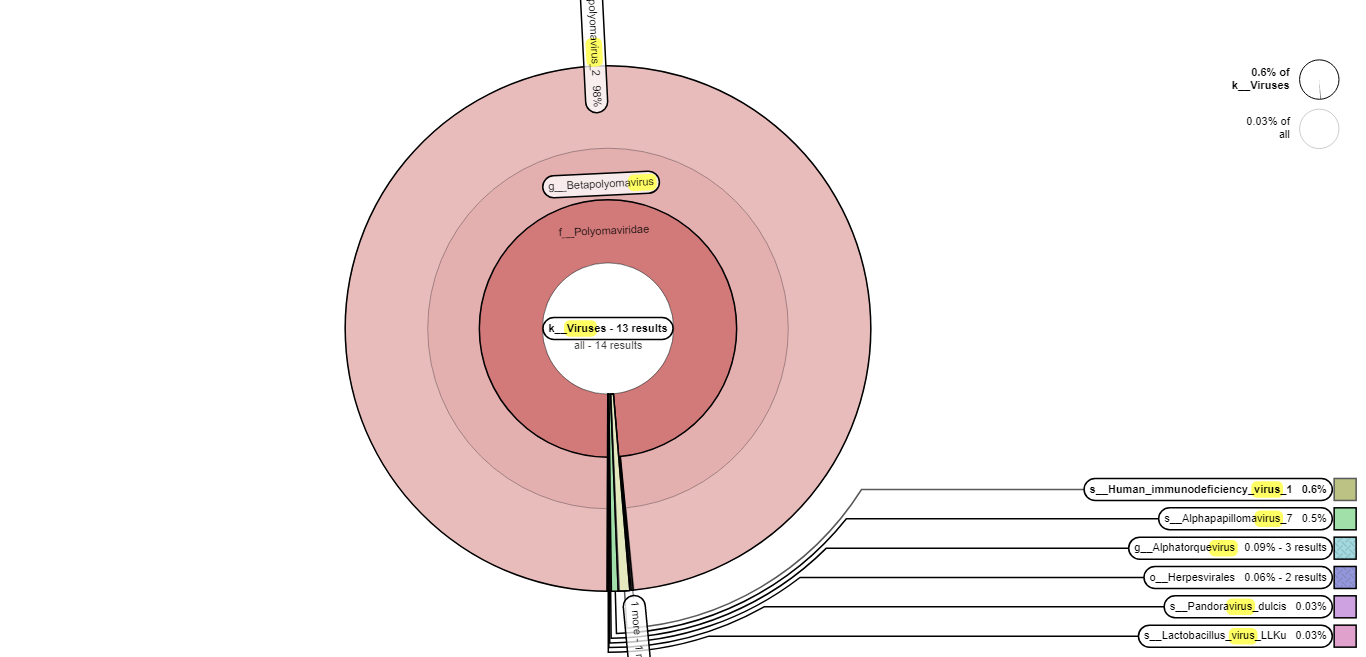